In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist


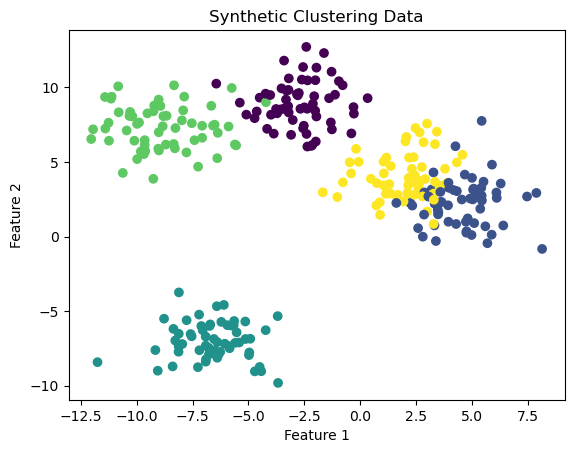

In [7]:
# Generate synthetic data
n_samples = 300  # number of samples
n_features = 2   # number of features
centers = 5      # number of clusters
cluster_std = 1.5 # standard deviation of clusters

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Clustering Data')
plt.show()

In [23]:
random_indices = np.random.choice(X.shape[0], size=centers, replace=False)
random_rows = X[random_indices]
print(random_rows)

[[-6.10060742 -4.58100122]
 [ 2.01034127  6.38136776]
 [-2.37862702  8.5657751 ]
 [-8.38865326 -8.70139251]
 [ 2.57337478  0.56643212]]


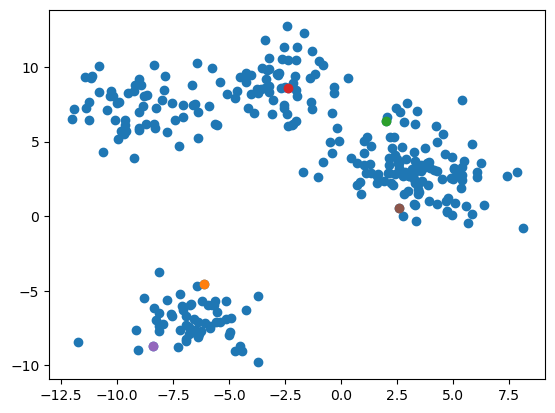

In [24]:
plt.scatter(X[:, 0], X[:, 1])
for i in range(len(random_rows)):
    plt.scatter(random_rows[i][0], random_rows[i][1])

In [25]:
distances = cdist(X, random_rows, metric='euclidean')
print(distances)

[[15.27239214  3.35212764  2.79063841 19.97584025  8.99647525]
 [12.01003234  2.26282751  3.46334597 16.72299019  5.98916643]
 [11.34867464  4.21740203  2.49768698 16.02140653  7.28614507]
 ...
 [14.07245102  2.9572531   2.11203596 18.7737882   8.18829647]
 [12.25566103  1.38171812  4.81691405 16.94131969  4.93565606]
 [13.42999738  5.84820232  1.03158697 17.98108706  9.99838772]]


In [26]:
min_indices = np.argmin(distances, axis=1)
min_indices = min_indices.reshape(-1, 1)

print(min_indices)

[[2]
 [1]
 [2]
 [4]
 [2]
 [2]
 [4]
 [3]
 [2]
 [1]
 [4]
 [2]
 [4]
 [2]
 [4]
 [2]
 [4]
 [4]
 [1]
 [2]
 [2]
 [1]
 [2]
 [4]
 [4]
 [2]
 [0]
 [4]
 [4]
 [3]
 [2]
 [4]
 [1]
 [2]
 [0]
 [4]
 [4]
 [1]
 [2]
 [4]
 [2]
 [4]
 [0]
 [2]
 [1]
 [2]
 [2]
 [3]
 [1]
 [3]
 [2]
 [1]
 [3]
 [2]
 [2]
 [2]
 [4]
 [2]
 [2]
 [0]
 [2]
 [2]
 [4]
 [1]
 [0]
 [4]
 [3]
 [3]
 [0]
 [0]
 [1]
 [3]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [4]
 [2]
 [3]
 [2]
 [2]
 [4]
 [2]
 [3]
 [2]
 [4]
 [4]
 [1]
 [1]
 [4]
 [2]
 [1]
 [2]
 [2]
 [4]
 [2]
 [4]
 [1]
 [2]
 [2]
 [4]
 [0]
 [1]
 [2]
 [2]
 [4]
 [2]
 [4]
 [2]
 [1]
 [4]
 [4]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [4]
 [4]
 [2]
 [2]
 [4]
 [2]
 [4]
 [2]
 [2]
 [2]
 [2]
 [4]
 [3]
 [4]
 [2]
 [2]
 [2]
 [4]
 [1]
 [2]
 [1]
 [3]
 [4]
 [3]
 [1]
 [0]
 [0]
 [4]
 [2]
 [1]
 [3]
 [2]
 [2]
 [4]
 [2]
 [2]
 [1]
 [4]
 [2]
 [2]
 [4]
 [4]
 [4]
 [1]
 [3]
 [2]
 [4]
 [1]
 [2]
 [4]
 [2]
 [4]
 [3]
 [0]
 [2]
 [2]
 [4]
 [3]
 [3]
 [1]
 [2]
 [2]
 [3]
 [4]
 [1]
 [0]
 [2]
 [3]
 [3]
 [2]
 [2]
 [3]
 [1]
 [4]


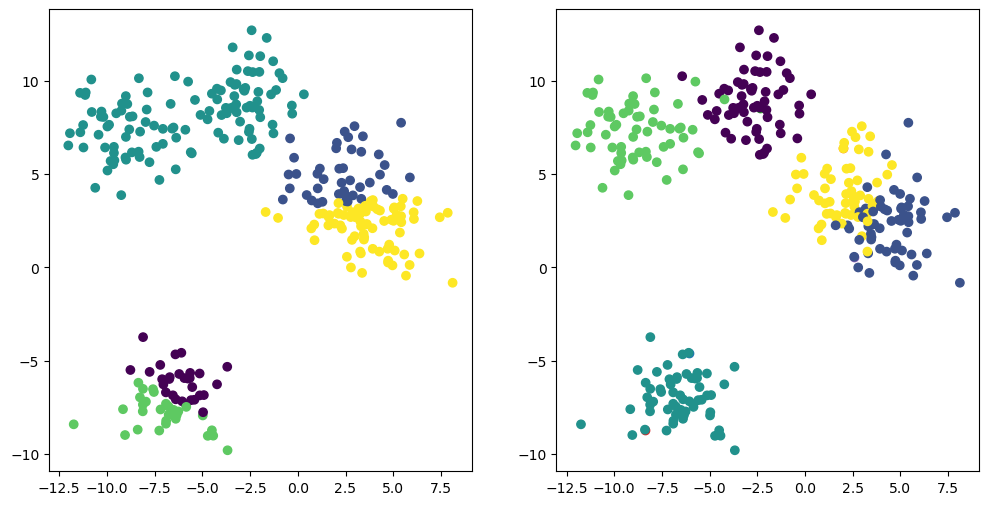

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(X[:, 0], X[:, 1], c=min_indices, cmap='viridis')
for i in range(len(random_rows)):
    plt.scatter(random_rows[i][0], random_rows[i][1])

ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

In [28]:
X_with_indices = np.hstack((X, min_indices))

df = pd.DataFrame(X_with_indices, columns=[f'Feature_{i}' for i in range(X.shape[1])] + ['Max_Index'])

# Calculate the mean value of each column grouped by the max_indices column
new_centroids = df.groupby('Max_Index').mean()

print(new_centroids)

           Feature_0  Feature_1
Max_Index                      
0.0        -6.122986  -6.113200
1.0         2.304086   4.989106
2.0        -5.827655   8.103989
3.0        -7.026085  -7.856874
4.0         3.707748   2.165202


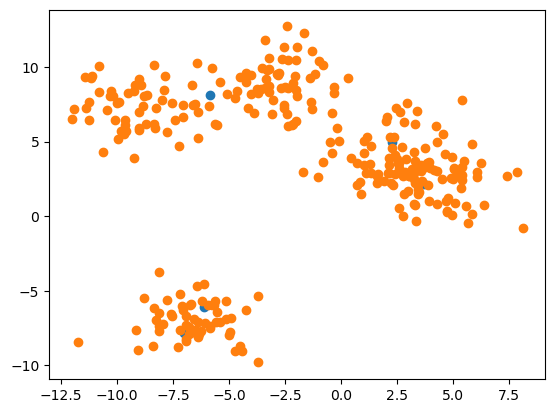

In [29]:
plt.scatter(new_centroids['Feature_0'], new_centroids['Feature_1'])
plt.scatter(X[:, 0], X[:, 1])


In [30]:
import sys
sys.path.insert(0, '../')  # Assuming 'kmeans_project' is the parent directory of 'data' and 'src'
from src.kmeans import KMeans
# Example usage
kmeans = KMeans(n_clusters=4, max_iter=300, tol=0.1, random_state=42)
# Continue with fitting the model, predicting, etc.


In [31]:
kmeans.fit(X)

# Print final centroids and inertia (sum of squared distances)
print("Final centroids:")
print(kmeans.centroids)
print("Inertia (sum of squared distances):", kmeans.inertia)

# Optionally, predict cluster labels for new data points
# Example prediction
new_data = np.array([[0, 0], [10, 10]])  # Example new data points
predictions = kmeans.predict(new_data)
print("Predictions for new data:", predictions)

Final centroids:
[[ 3.26790441  3.11452707]
 [-2.68674382  8.84744669]
 [-6.58958733 -7.01409787]
 [-8.9409059   7.26477316]]
Inertia (sum of squared distances): 587.4288942659929
Predictions for new data: [0 0]


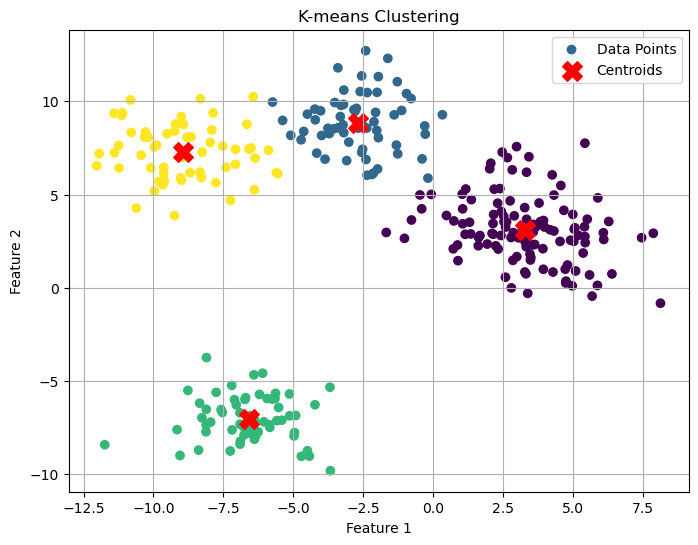

In [32]:
# Plotting data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', label='Data Points')

# Plot centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()